Training start...
Training end!
[[0.01147279]
 [0.01337933]
 [0.04438056]
 [0.02444437]
 [0.00997712]
 [0.03699715]
 [0.01081016]
 [0.7775156 ]
 [0.03050167]
 [0.06310079]]
('Answer: ', 7)


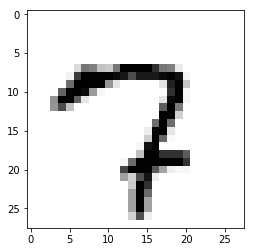

In [25]:
import numpy
import scipy.special
import scipy.misc
import matplotlib.pyplot

import imageio
import glob


class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)

        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.1

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("mnist_dataset/mnist_train_100.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

epochs = 10

print("Training start...")

for e in range (epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

print("Training end!")

TestRecord = 36

test_data_file = open("mnist_dataset/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

all_values = test_data_list[TestRecord].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))

matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

result = n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)
print(result)
label = numpy.argmax(result)
print("Answer: ", label)



('loading ... ', 'index_test_set/2828_4.png')
0.2471186
0.9090559
('loading ... ', 'index_test_set/2828_3.png')
0.28301093
0.8896791
('loading ... ', 'index_test_set/2828_8.png')
0.099336825
0.8392589
('loading ... ', 'index_test_set/2828_7.png')
0.121637076
0.9573796
('loading ... ', 'index_test_set/2828_2.png')
0.33048433
0.89714485
('loading ... ', 'index_test_set/2828_1.png')
0.35101426
0.8482776
('loading ... ', 'index_test_set/2828_9.png')
0.06609999
0.68347174
('loading ... ', 'index_test_set/2828_6.png')
0.18147576
0.8318941
('loading ... ', 'index_test_set/2828_0.png')
0.3998814
0.9831156
('loading ... ', 'index_test_set/2828_5.png')
0.2377738
0.8663849
[[0.06404351]
 [0.03293111]
 [0.01800798]
 [0.0200538 ]
 [0.09594613]
 [0.09101044]
 [0.10656878]
 [0.03780776]
 [0.03264544]
 [0.01532417]]
('network says ', 6)


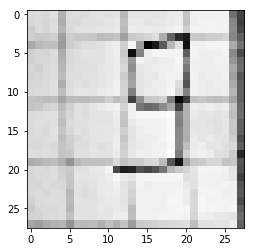

In [24]:
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('index_test_set/2828_?.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

item = 1

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

item = 6

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
